# Práctica 2 - Interligencia Artificial

#### Autores: Andreu Marqués Valerià y Álvaro Pimentel Lorente
#### Fecha de entrega 13/01/2023




Se importan las principales librerías que se van a utilizar en la práctica.

In [25]:
import numpy as np 
import pandas as pd

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

## Lectura de datos

Para leer los datos emplearemos al librería ``pandas``. El fichero de datos es proporcionado por Kaggle y se puede descargar [aquí](https://www.kaggle.com/competitions/titanic).

In [102]:
df_train = pd.read_csv('dades.csv')
pd.set_option('display.max_columns', None)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Limpieza de valores innecesarios o 'ruido'

Eliminamos las columnas ``PassengerId``, ``Name`` y ``Ticket`` ya que no aportan información relevante para el entrenamiento del modelo.

In [103]:
df_train.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


## Tratado de valores nulos (``Nan``)

A continuación buscamos en qué columnas existen valores ``Nan``. Como se puede observar, únicamente existen 3 columnas con valores nulos: ``Age``, ``Cabin`` y ``Embarked``

In [28]:
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

La columna ``Cabin`` tiene muchos valores nulos, por lo que una opción sería eliminarla. Sin embargo, nos aporta infomación sobre si el pasajero tiene camarote a su nombre o no. Por lo tanto, sustituiremos los valores nulos por ``0`` y los valores no nulos por ``1``.

In [29]:
HasCabin = df_train['Cabin'].notnull().astype('int')
df_train['Cabin'] = HasCabin
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,0,S
1,1,1,female,38.0,1,0,71.2833,1,C
2,1,3,female,26.0,0,0,7.9250,0,S
3,1,1,female,35.0,1,0,53.1000,1,S
4,0,3,male,35.0,0,0,8.0500,0,S


Continuamos con la columna ``Age`` que tiene algunos valores ``Nan``. En este caso, sustituiremos aquellos valores nulos por la mediana de los valores de la columna ``Age``

In [30]:
df_train['Age'].fillna(df_train['Age'].median(), inplace = True)

En el caso de la columna ``Embarked``, aplicaremos el mismo proceso anterior. Para determinar el valor con el que reemplazar los valores faltantes, se llama al método mode en la columna ``Embarked``. Este método devuelve el valor más frecuente de la columna, que en este caso es el valor más comúnmente embarcado por los pasajeros.

In [31]:
df_train['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace = True)

In [32]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,0,S
1,1,1,female,38.0,1,0,71.2833,1,C
2,1,3,female,26.0,0,0,7.9250,0,S
3,1,1,female,35.0,1,0,53.1000,1,S
4,0,3,male,35.0,0,0,8.0500,0,S


## Conversión de valores y columnas

En este conjunto de datos, hay características como la columna ``Embarked`` que no son adecuadas para el aprendizaje automático. Para arreglarlo, necesitamos convertir todas las columnas de nuestros datos en valores numéricos. Una forma de hacerlo es utilizando la técnica de codificación ``One hot``, que consiste en agregar más columnas para cada valor posible y llenarlas con un valor binario.
  
  ![One hot encoding](img/One_hot_encoding.png)  

En nuestro caso será necesario realizar one-hot encoding de las variables categóricas ``Sex``, ``Embarked`` y ``Pclass``. Para ello, utilizaremos la funcion ``get_dummies`` de ``pandas``.
  
    


In [33]:
df_onehot_Sex = pd.get_dummies(df_train['Sex'], prefix='Sex')

df_onehot_Pclass = pd.get_dummies(df_train['Pclass'], prefix='Pclass')

df_onehot_Embarked = pd.get_dummies(df_train['Embarked'], prefix='Embarked')



df_train = pd.concat([df_train, df_onehot_Sex, df_onehot_Pclass, df_onehot_Embarked], axis=1)

df_train.drop(columns=['Sex', 'Pclass', 'Embarked'], inplace=True)

df_train.head()


,Survived,Age,SibSp,Parch,Fare,Cabin,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,0,1,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,1,0,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,1,1,0,1,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,0,1,0,0,1,0,0,1


Ahora nos encontramos con que tenemos diferentes tipos de datos. Para poder entrenar el modelo, todos los datos deben ser del mismo tipo. Por lo tanto, convertiremos todos los datos a tipo ``float`` que permiten conservar los decimales.

In [34]:
for column in df_train:
    df_train[column]=df_train[column].astype(float)

A continuación, combinaremos las columnas ``SibSp`` y ``Parch`` para formar unidades familiares

In [35]:
df_train['Familiars'] = df_train['SibSp'] + df_train['Parch'] + 1

df_train.drop(columns=['SibSp', 'Parch'], inplace=True)

df_train

,Survived,Age,Fare,Cabin,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Familiars
0,0.0,22.0,7.2500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0
1,1.0,38.0,71.2833,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0
2,1.0,26.0,7.9250,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,1.0,35.0,53.1000,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
4,0.0,35.0,8.0500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,27.0,13.0000,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
887,1.0,19.0,30.0000,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
888,0.0,28.0,23.4500,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0
889,1.0,26.0,30.0000,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


## Análisis de los datos

Realizamos una matriz de correlación para observar qué variables están más correlacionadas entre sí.

In [36]:
corr = df_train.corr()
corr.style.background_gradient(cmap='coolwarm')

,Survived,Age,Fare,Cabin,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Familiars
Survived,1.000000,-0.064910,0.257307,0.316912,0.543351,-0.543351,0.285904,0.093349,-0.322308,0.168240,0.003650,-0.149683,0.016639
Age,-0.064910,1.000000,0.096688,0.240314,-0.081163,0.081163,0.323896,0.015831,-0.291955,0.030248,-0.031415,-0.006729,-0.245619
Fare,0.257307,0.096688,1.000000,0.482075,0.182333,-0.182333,0.591711,-0.118557,-0.413333,0.269335,-0.117216,-0.162184,0.217138
Cabin,0.316912,0.240314,0.482075,1.000000,0.140391,-0.140391,0.788773,-0.172413,-0.539291,0.208528,-0.129572,-0.101139,-0.009175
Sex_female,0.543351,-0.081163,0.182333,0.140391,1.000000,-1.000000,0.098013,0.064746,-0.137143,0.082853,0.074115,-0.119224,0.200988
Sex_male,-0.543351,0.081163,-0.182333,-0.140391,-1.000000,1.000000,-0.098013,-0.064746,0.137143,-0.082853,-0.074115,0.119224,-0.200988
Pclass_1,0.285904,0.323896,0.591711,0.788773,0.098013,-0.098013,1.000000,-0.288585,-0.626738,0.296423,-0.155342,-0.161921,-0.046114
Pclass_2,0.093349,0.015831,-0.118557,-0.172413,0.064746,-0.064746,-0.288585,1.000000,-0.565210,-0.125416,-0.127301,0.189980,-0.038594
Pclass_3,-0.322308,-0.291955,-0.413333,-0.539291,-0.137143,0.137143,-0.626738,-0.565210,1.000000,-0.153329,0.237449,-0.015104,0.071142
Embarked_C,0.168240,0.030248,0.269335,0.208528,0.082853,-0.082853,0.296423,-0.125416,-0.153329,1.000000,-0.148258,-0.782742,-0.046215


Podemos observar que por una parte, encontramos redundancia en las columnas ``Sex_female`` y ``Sex_male`` por tanto eliminaremos una de ellas

In [37]:
df_train.drop(columns=['Sex_male'], inplace=True)

A demás, también podemos ver que las variables con más correlación con la columna ``Survived`` són el sexo, si tenía camarote o no, el precio del billete y la clase en la que viajaba cada pasajero.

A remarcar serían las columnas ``Pclass`` que tal y como aparecen en esta matriz nos dan a entender que cuanto menor sea el valor de la clase más posiblidades tienen de sobrevivir. Esto tiene mucho sentido puesto que al principio la columna ``Pclass`` se dividía en 3 subgrupos: Aquellos de primera clase eran los ricos, los de segunda clase eran aquellos con un poder adquisitivo medio y, finalmente, aquellos con un poder adquisitivo más bajo considerados tercera clase. Pon lo tanto, cuanto más rico fueran los pasajeros más posibilidades tenían de sobrevivir.

Por último también destacar la columna ``Fare`` que con su correlación positiva indica que cuando más haya pagado el pasajero por el billete, mayores posibilidades tenía este de sobrevivir, dato que coincide con lo que se observa en el anàlisis anterior.

## Normalización

Para mantener los valores entre los mismos rangos en todas las columnas procedemos normalizarlos.

In [38]:
scaler = StandardScaler()
df_train.Age=scaler.fit_transform(df_train.Age.values.reshape(-1,1))
df_train.Fare=scaler.fit_transform(df_train.Fare.values.reshape(-1,1))
df_train.Familiars=scaler.fit_transform(df_train.Familiars.values.reshape(-1,1))
df_train.head()

,Survived,Age,Fare,Cabin,Sex_female,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Familiars
0,0.0,-0.565736,-0.502445,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.059160
1,1.0,0.663861,0.786845,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.059160
2,1.0,-0.258337,-0.488854,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.560975
3,1.0,0.433312,0.420730,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.059160
4,0.0,0.433312,-0.486337,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-0.560975


## Entrenamiento de los modelos

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Perceptron

### Separación del conjunto de datos en entrenamiento y test

En este caso separamos la columna ``Survived`` que es la que nos interesa predecir.

In [40]:
X_train, X_test, y_train, y_test = train_test_split(df_train.drop(columns=['Survived']), df_train['Survived'], test_size=0.3)

## **Árboles de decisiones**

La técnica de aprendizaje automático conocida como ``Árbol de decisiones`` emplea una estructura en forma de árbol para tomar decisiones como su propio nombre indica. Los nodos intermedios representan soluciones y los nodos finales proporcionan la predicción deseada. En cada nodo, se toma una decisión basada en un atributo asignado, utilizando la entropia para determinar los atributos de decisión más precisos.  
En problemas de mayor complejidad se puede emplear el ``Random Forest Classifier`` que, como su nombre indica, emplea varios arboles de decisión. Este método es más preciso por norma general que el árbol de decisión normal, pero también más lento.


A continuación, mediante la funcion GridSearchCV, se ha realizado una búsqueda de los mejores parámetros para cada uno de los dos modelos

A continuación, mediante la funcion GridSearchCV, se ha realizado una búsqueda de los mejores parámetros para el modelo de Random Forest. En este caso se genera un diccionario ``parametros`` con los parámetros que se quieren probar. A continuación, se crea un objeto ``grid`` de la clase ``GridSearchCV``. Este objeto recibe como parámetros el modelo ``RandomForestClassifier``, el diccionario de parámetros ``parametros``. Para evaluar nuestro modelo, usaremos una validación cruzada de 5 veces con la precisión, ya que es la métrica que usa ``Kaggle`` la tabla de clasificación.

In [41]:
parametrosRF = {
                 'max_depth' : [4, 6, 8, 10],
                 'n_estimators': [100, 75, 50, 25, 10],
                 'max_features': ['sqrt'],
                 'min_samples_split': [2, 3, 5, 8],
                 'min_samples_leaf': [2, 3, 5, 8],
                 'bootstrap': [True, False],
                 'n_jobs': [-1],
                 'criterion': ['gini', 'entropy', 'log_loss']
                 }

RanForest = RandomForestClassifier()

gridSearchRF = GridSearchCV(RanForest, scoring='accuracy', param_grid=parametrosRF, cv=5, verbose=1)

gridSearchRF.fit(X_train, y_train)

parametersRF = gridSearchRF.best_params_

print('Mejor puntuación RandomForest: {}'.format(gridSearchRF.best_score_))
print('Mejores parámetros RandomForest: {}'.format(gridSearchRF.best_params_))

Fitting 5 folds for each of 1920 candidates, totalling 9600 fits
Mejor puntuación RandomForest: 0.8234322580645161
Mejores parámetros RandomForest: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 10, 'n_jobs': -1}


Realizamos el mismo proceso con el árbol de decisión

In [45]:
parametrosDT = {
                 'max_depth' : [4, 6, 8, 10],
                 'max_features': ['sqrt'],
                 'min_samples_split': [2, 3, 5, 8],
                 'min_samples_leaf': [2, 3, 5, 8],
                 'criterion': ['gini', 'entropy', 'log_loss']
                 }

DecTree = DecisionTreeClassifier()

gridSearchDT = GridSearchCV(DecTree, scoring='accuracy', param_grid=parametrosDT, cv=5, verbose=1)

gridSearchDT.fit(X_train, y_train)

parametersDT = gridSearchDT.best_params_

print('Mejor puntuación DecisionTree: {}'.format(gridSearchDT.best_score_))
print('Mejores parámetros DecisionTree: {}'.format(gridSearchDT.best_params_))

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Mejor puntuación DecisionTree: 0.8153806451612903
Mejores parámetros DecisionTree: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 3}


## **Regresión Logística**

La regresión logística es un tipo de análisis de regresión utilizado para predecir el resultado de una variable categórica (una variable que puede adoptar un número limitado de categorías) en función de las variables independientes o predictoras. Es útil para modelar la probabilidad de un evento ocurriendo en función de otros factores

Para entrenar el modelo seguiremos el mismo proceso que con el árbol de decisión y entrenamos del modelo de Regresion Logística con los mejores parámetros mediante la funcion ``GridSearchCV``

In [83]:
parametrosLOG = {
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter' : [100, 700, 1000, 2500, 5000],
}

LogReg = LogisticRegression()
gridSearchLOG = GridSearchCV(LogReg, scoring='accuracy', param_grid=parametrosLOG, cv=5, verbose=0)

gridSearchLOG.fit(X_train, y_train)

parametersLOG = gridSearchLOG.best_params_

print('Mejor puntuación LogisticRegression: {}'.format(gridSearchLOG.best_score_))
print('Mejores parámetros LogisticRegression: {}'.format(gridSearchLOG.best_params_))


c:\Users\alvar\Documents\GitHub\ia_2022\.venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\alvar\Documents\GitHub\ia_2022\.venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\alvar\Documents\GitHub\ia_2022\.venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\alvar\Documents\GitHub\ia_2022\.venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\alvar\Documents\GitHub\ia_2022\.venv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Us

Mejor puntuación LogisticRegression: 0.8025806451612902
Mejores parámetros LogisticRegression: {'max_iter': 100, 'solver': 'newton-cg'}


## **Perceptrón**

Un perceptrón es un modelo matemático basado en la estructura y función simplificadas de una neurona biológica. Los valores de entrada se utilizan para alimentar el modelo, el cual se ejecuta y produce una salida. Si la salida es igual a la salida deseada, el modelo está funcionando correctamente y no se hacen cambios en los pesos. Si la salida no es la deseada, se ajustan los pesos para reducir el error hasta que el modelo alcance una solución con un error mínimo.

Al igual que en los modelos anteriores emplearemos el método ``GridSearchCV`` para encontrar los mejores parámetros para el modelo

In [49]:
parametrosPercep = {
    'max_iter' : [100, 700, 1000, 2500, 5000],
    'alpha' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    'shuffle' : [True, False]
}


Percep = Perceptron()

gridSearchPercep = GridSearchCV(Percep, scoring='accuracy', param_grid=parametrosPercep, cv=5, verbose=1)

gridSearchPercep.fit(X_train, y_train)

parametersPercep = gridSearchPercep.best_params_

print('Mejor puntuación Perceptron: {}'.format(gridSearchPercep.best_score_))
print('Mejores parámetros Perceptron: {}'.format(gridSearchPercep.best_params_))

Fitting 5 folds for each of 70 candidates, totalling 350 fits
Mejor puntuación Perceptron: 0.7014838709677419
Mejores parámetros Perceptron: {'alpha': 0.0001, 'max_iter': 100, 'shuffle': False}


## **Feature Importance**

La segunda etapa consiste en determinar la relevancia de cada característica en cada uno de los modelos, conocido como ``feature importance``.
Los modelos asignan pesos $w_{i}$ a los diferentes parámetros $x_{i}$ para poder hacer sus predicciones.

Para llevar a cabo esta tarea, debemos obtener los pesos de cada parámetro en todos los modelos.

Para ello crearemos un dataframe con los pesos de cada parámetro en cada modelo.

In [95]:
df_FI = pd.DataFrame(columns=df_train.columns.drop('Survived'))
df_FI

,Age,Fare,Cabin,Sex_female,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Familiars


Para este paso sería necesario normalizar los datos para poderlos comparar. Sin embargo, esta normalización ya se ha realizado en la primera parte y por tanto no es necesaria.

In [96]:
keys = df_FI.columns
pesosRandomForest = gridSearchRF.best_estimator_.feature_importances_
pesosDecisionTree = gridSearchDT.best_estimator_.feature_importances_

df_RF = pd.DataFrame(dict(zip(keys, pesosRandomForest)), index=['Pesos RandomForest'])
df_DT = pd.DataFrame(dict(zip(keys, pesosDecisionTree)), index=['Pesos DecisionTree'])

df_FI = pd.concat([df_RF, df_DT], axis=0)
df_FI


,Age,Fare,Cabin,Sex_female,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Familiars
Pesos RandomForest,0.108024,0.142105,0.158496,0.363688,0.014596,0.021170,0.078512,0.018365,0.004363,0.012750,0.077930
Pesos DecisionTree,0.228533,0.220066,0.122041,0.238623,0.001122,0.006416,0.085516,0.000000,0.003779,0.021781,0.072123


A contintinuación, mediante un gráfico observamos cuales son las columnas con mayor importancia para ambos modelos

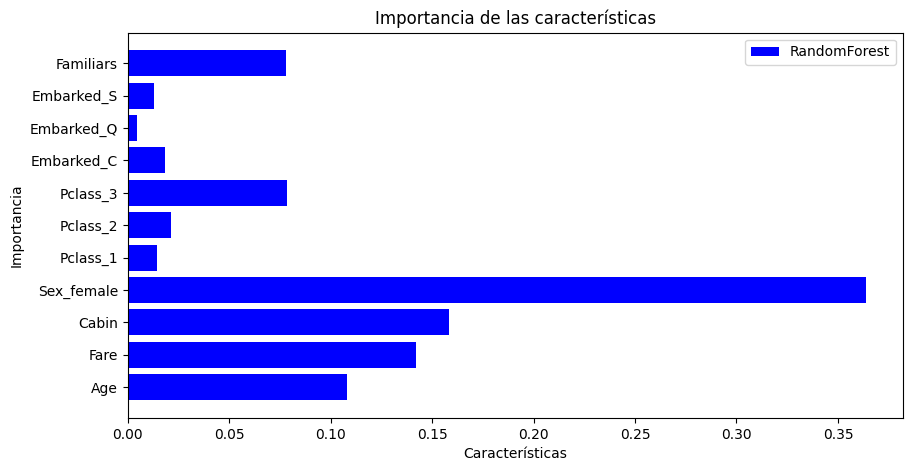

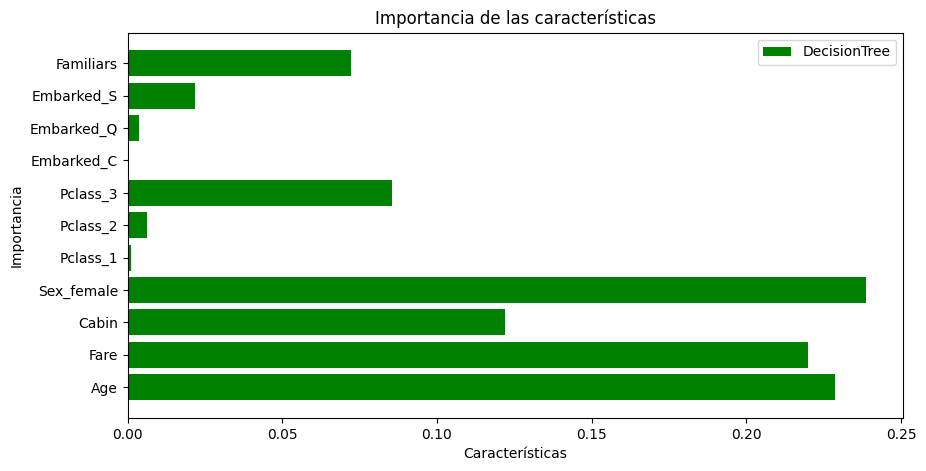

In [97]:

plt.figure(figsize=(10, 5))
plt.title('Importancia de las características')
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.barh(df_FI.columns, df_FI.loc['Pesos RandomForest'], label='RandomForest', color='blue')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.title('Importancia de las características')
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.Color='red'
plt.barh(df_FI.columns, df_FI.loc['Pesos DecisionTree'], label='DecisionTree', color='green')
plt.legend()
plt.show()

Podemos observar que la característica más importante, con diferencia, para el modelo ``Random Forest`` es la columna ``Sex_female``.  
  En el caso del modelo ``Decision Tree`` encontramos bastante pareja la importancia que se le atribuye a las columnas ``Sex_female``,  ``Age`` y ``Fare`` por ese orden.

A continuación añadimos al dataframe los pesos de los modelos ``Logistic Regression`` y ``Perceptron``

In [98]:

pesosLogistic = gridSearchLOG.best_estimator_.coef_[0]
pesosPerceptron = gridSearchPercep.best_estimator_.coef_[0]

df_LOG = pd.DataFrame(dict(zip(keys, pesosLogistic)), index=['Pesos LogisticRegression'])
df_PER = pd.DataFrame(dict(zip(keys, pesosPerceptron)), index=['Pesos Perceptron'])

df_FI = pd.concat([df_FI, df_LOG, df_PER], axis=0)

df_FI


,Age,Fare,Cabin,Sex_female,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Familiars
Pesos RandomForest,0.108024,0.142105,0.158496,0.363688,0.014596,0.021170,0.078512,0.018365,0.004363,0.012750,0.077930
Pesos DecisionTree,0.228533,0.220066,0.122041,0.238623,0.001122,0.006416,0.085516,0.000000,0.003779,0.021781,0.072123
Pesos LogisticRegression,-0.528818,0.166399,1.149461,2.459996,0.264581,0.430050,-0.694631,0.205513,0.108796,-0.314309,-0.374425
Pesos Perceptron,-2.868036,0.643076,5.000000,4.000000,1.000000,2.000000,-3.000000,2.000000,1.000000,-3.000000,-1.860404


De la misma manera de antes, mediante un gráfico, observamos cuales son las columnas con mayor importancia para ambos modelos

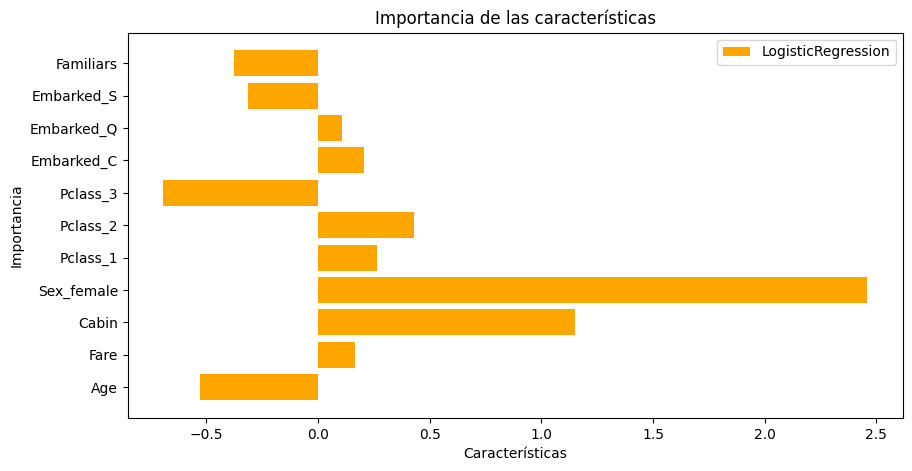

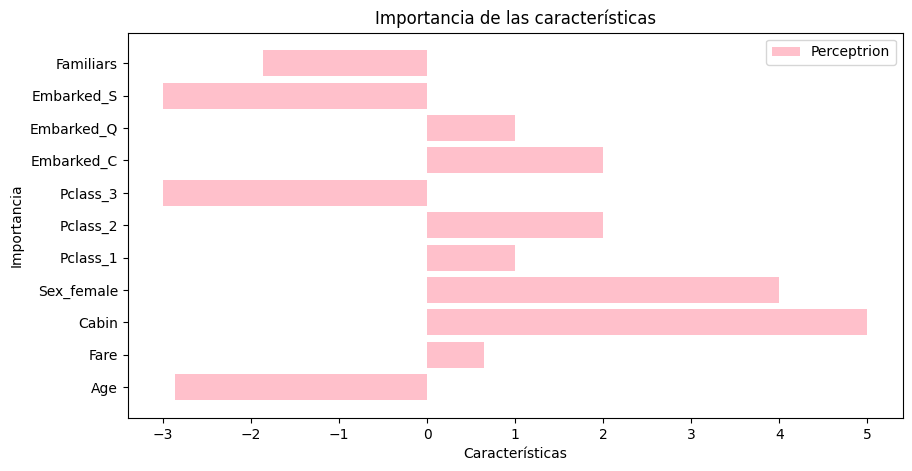

In [100]:

plt.figure(figsize=(10, 5))
plt.title('Importancia de las características')
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.barh(df_FI.columns, df_FI.loc['Pesos LogisticRegression'], label='LogisticRegression', color='orange')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.title('Importancia de las características')
plt.xlabel('Características')
plt.ylabel('Importancia')
plt.Color='red'
plt.barh(df_FI.columns, df_FI.loc['Pesos Perceptron'], label='Perceptrion', color='pink')
plt.legend()
plt.show()

Si bien entre si mismos existen diferencias, ambos gráficos muestran similitud señalan información relevante que ambos comparten. Por ejemplo, estos gráficos indican que si el pasajero era de tercera clase, tenía unas altas probabilidades de morir. Sin embargo ser mujer y tener un camarote son las dos cosas que más podrían ayudar a que un pasajero sobreviviera.

## Conclusiones

Después de analizar todos los datos recogidos de los entrenamientos de los modelos y haber visto cual es son las variables con mayor peso. Se puede asegurar que las características que debía tener un pasajero para tener más posibilidades de sobrevivir eran las siguientes: 
- En primer lugar ser del sexo femenino. 
- En segundo lugar tener un camarote.
- En tercer lugar ser de primera clase.